In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [4]:
import matplotlib.patches as mpatches
import os

In [5]:
data_path = r'C:\Users\roseh\Desktop\NYBG_R\data\dandan\Output_dataframe'
out_path = r'C:\Users\roseh\Desktop\NYBG_R\data\processed\QC2\plots\summary_plots\exp'

In [6]:
df = pd.read_csv(os.path.join(data_path,'NYBG_Carbon_fluxes.csv'), parse_dates = ['Date'])

df['Type'] = df['Label'].str[-3:-1]
df['Number'] = df['Label'].str[-1]

In [7]:
df.head()

,Unnamed: 0,Date,DT_R,DT_NEE,Label,Res,NEE,NEE1,NEE2,GEE,PAR,Soil temperature,Soil_moist,Type,Number
0,0,2022-05-23,[],[],BW_TP1,NaN,NaN,NaN,NaN,NaN,NaN,19.5,43.7,TP,1
1,1,2022-05-23,[],[],BW_TP2,NaN,NaN,NaN,NaN,NaN,NaN,20.3,36.8,TP,2
2,2,2022-05-23,[],[],BW_TP3,NaN,NaN,NaN,NaN,NaN,NaN,21.3,55.1,TP,3
3,3,2022-05-23,[],[],BW_TP4,NaN,NaN,NaN,NaN,NaN,NaN,21.0,45.4,TP,4
4,4,2022-05-23,[],[],BT_FE1,NaN,NaN,NaN,NaN,NaN,NaN,17.8,52.2,FE,1


In [57]:
def exponential(x, a, b):
    """Calculate the exponential with constants a and b"""
    return a*np.exp(b*x)

def exp_params(df,a_guess,b_guess):
    
    # define x, y variables as all non-NA values
    x = df['Soil temperature']
    y = df['Res']

    boo_x = ~np.isnan(x)
    boo_y = ~np.isnan(y)
    boo=np.logical_and(boo_x,boo_y)

    x = x[boo]
    y = y[boo]
    
    # Fit the function a * np.exp(b * x)  to x and y
    pars, cov = curve_fit(exponential,x, y,p0=[a_guess,b_guess])
    
    # define parameters as a and b
    a = pars[0]
    b = pars[1]
    
    
    # print optimized parameters
    print(f'a={a},b={b}')
    
    # Create the fitted curve
    x_fitted = np.linspace(np.min(x), np.max(x), 100)
    y_fitted = a * np.exp(b * x_fitted) 
    
    return pars, cov, x_fitted, y_fitted
    

In [9]:
pars, cov, x_fitted, y_fitted = exp_params(df)

a=0.7258265578614496,b=0.1256749786175207


In [35]:
err = np.sqrt(np.diag(cov))
err

array([0.24607385, 0.0139651 ])

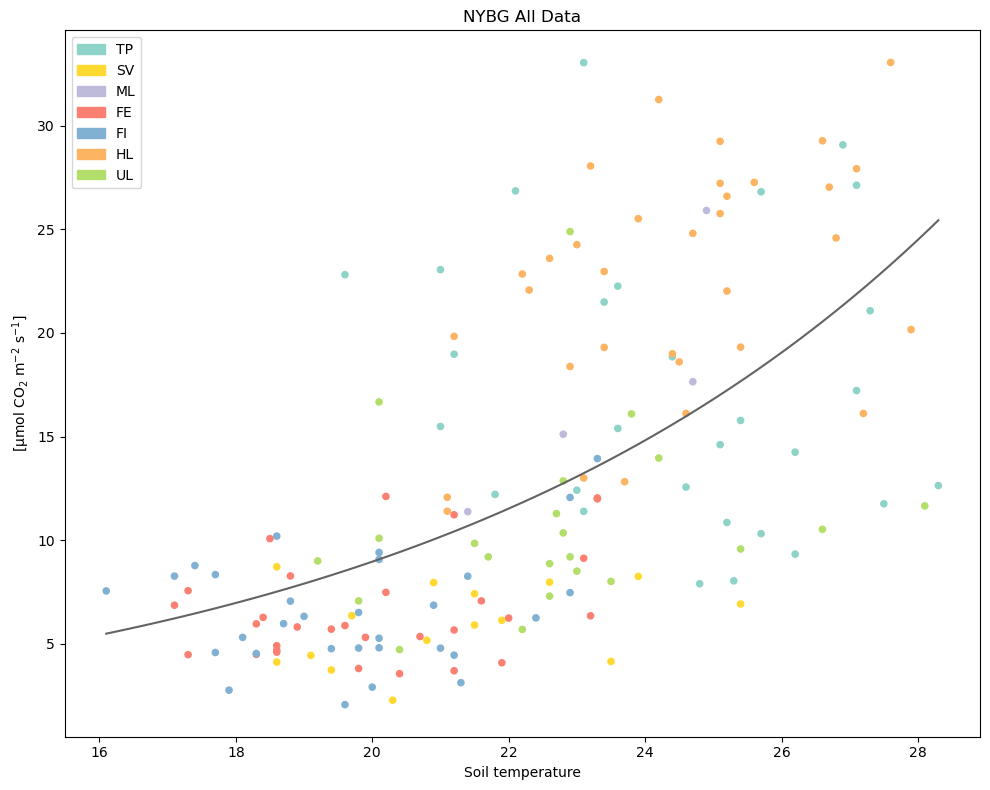

In [30]:
# plot all data on one axis

colors = ['#8dd3c7','#ffd92f','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69']
types = ['TP', 'SV', 'ML', 'FE', 'FI', 'HL', 'UL']
color_dict = dict(zip(types,colors))

fig, ax = plt.subplots(figsize=(10,8))

df.plot('Soil temperature', 'Res', ax=ax, kind='scatter', color=df['Type'].replace(color_dict)) # plot data points

ax.plot(x_fitted, y_fitted, color='#636363')    # plot fitted curve

# get legend info
patch_list = []
i = 0
for t in types:
    patch_list.append(mpatches.Patch(label=t, color=colors[i]))
    i += 1

plt.ylabel('[\u03BCmol CO$_{2}$ m$^{-2}$ s$^{-1}]$')
plt.legend(handles=patch_list,loc='upper left')
plt.title('NYBG All Data')
plt.tight_layout()
plt.show()
fig.savefig(os.path.join(out_path, 'nybg_alldata_exp.png'))
plt.close()

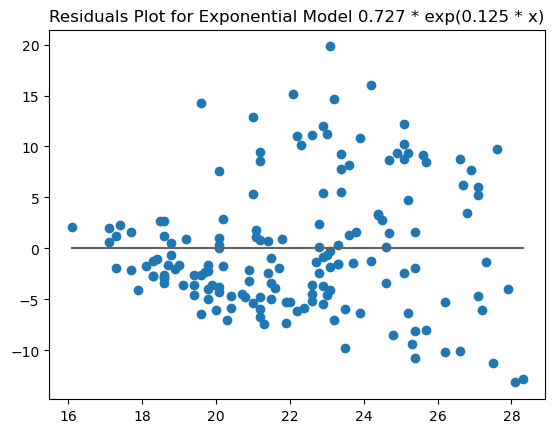

In [47]:
# plot residuals for above model

res = y - exponential(x, *pars)

fig,ax=plt.subplots()
ax.scatter(x,res)
ax.plot(np.linspace(np.min(x), np.max(x), 100),np.zeros(100),color='#636363')
ax.set_title(r'Residuals Plot for Exponential Model 0.727 * exp(0.125 * x)')

plt.show()

In [11]:
data_path = r'C:\Users\roseh\Desktop\NYBG_R\data\processed\Lamont'

In [40]:
df_l = pd.read_csv(os.path.join(data_path,'LDEO_Carbon_fluxes.csv'))

In [41]:
df_l['Type'] = df_l['Label'].str[-3:-1]

In [62]:
pars, cov, x_fitted, y_fitted = exp_params(df_l,-1,.18)

a=1.0025252920139751,b=0.1140362274999306


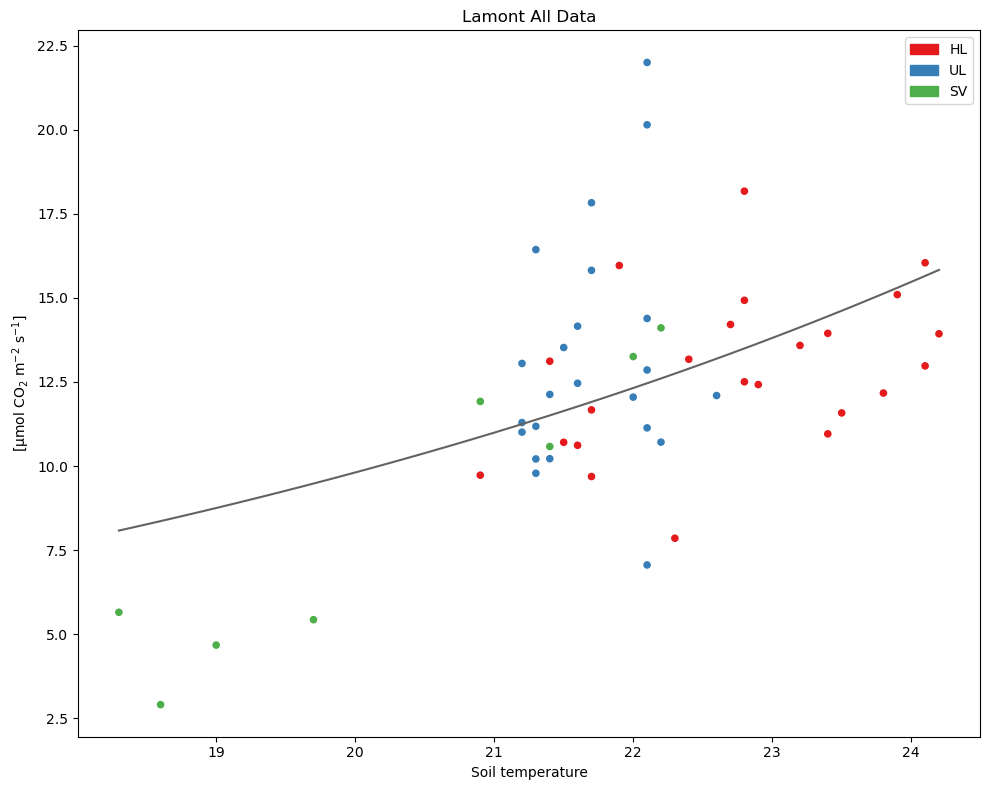

NameError: name 'plots_path' is not defined

In [63]:
# plot all data on one axis

colors = ['#e41a1c','#377eb8','#4daf4a']
types = ['HL', 'UL', 'SV']
color_dict = dict(zip(types,colors))

fig, ax = plt.subplots(figsize=(10,8))

df_l.plot('Soil temperature', 'Res', ax=ax, kind='scatter', color=df_l['Type'].replace(color_dict))

ax.plot(x_fitted, y_fitted, color='#636363')    # plot fitted curve

# get legend info
patch_list = []
i = 0
for t in types:
    patch_list.append(mpatches.Patch(label=t, color=colors[i]))
    i += 1

plt.ylabel('[\u03BCmol CO$_{2}$ m$^{-2}$ s$^{-1}]$')
plt.legend(handles=patch_list)
plt.title('Lamont All Data')
plt.tight_layout()
plt.show()
fig.savefig(os.path.join(plots_path, 'ldeo_all_data.png'))
plt.close()